In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

from tts_king import TTSKing

In [2]:
tts_king = TTSKing(config_path='config.yaml')

Removing weight norm for inference HIFI GAN...


In [3]:
tts_king.text_preprocess('работать и работать')

Raw Text Sequence: работать и работать
Phoneme Sequence: {r a b o t a tj sp i sp r a b o t a tj}


array([[392, 366, 367, 389, 396, 366, 399, 357, 375, 357, 392, 366, 367,
        389, 396, 366, 399]])

In [4]:
tts_king.text_preprocess_eng('work in. progress')

Raw Text Sequence: work in. progress
Phoneme Sequence: {W ER1 K IH0 N sp P R AA1 G R EH2 S}


array([[144,  98, 116, 108, 119, 357, 129, 130,  66, 105, 130,  95, 360]])

In [104]:
mel_postnet = tts_king.generate_mel("эта штука работает но есть проблема. у нас есть не всйо слова", 0.8,0.8,1,2)

Raw Text Sequence: эта штука работает но есть проблема. у нас есть не всйо слова
Phoneme Sequence: {e t a sp S t u k a sp r a b o t a jE t sp n o sp jE s tj sp p r o b l jE m a sp sp sp u sp n a s sp jE s tj sp n jE sp v s j o sp s l o v a}


In [105]:
mel_postnet_np = np.array(mel_postnet.detach().cpu())[0]

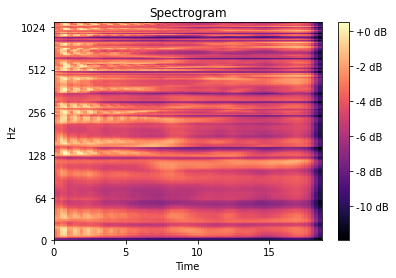

In [106]:
%matplotlib inline
librosa.display.specshow(mel_postnet_np, sr=2200, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram')
plt.show()

In [107]:
wav = tts_king.mel_to_wav(mel_postnet)

In [108]:
import IPython.display as ipd
ipd.Audio(wav[0][0], rate=22050) 

In [131]:
mel_postnet = tts_king.generate_mel("Оно работает но пока очень плохо ", 0.8,0.8,1,2)
mel_postnet_np = np.array(mel_postnet.detach().cpu())[0]
wav = tts_king.mel_to_wav(mel_postnet)
ipd.Audio(wav[0][0], rate=22050) 

Raw Text Sequence: Оно работает но пока очень плохо 
Phoneme Sequence: {o n o sp r a b o t a jE t sp n o sp p o k a sp o tS jE nj sp p l o x o sp sp}


In [151]:
mel_postnet = tts_king.generate_mel("у меня Нет всех слов что бы сказать то что я хочу", 1,1,0.5,1)
mel_postnet_np = np.array(mel_postnet.detach().cpu())[0]
wav_fe = tts_king.mel_to_wav(mel_postnet)
ipd.Audio(wav_fe[0][0], rate=22050) 

Raw Text Sequence: у меня Нет всех слов что бы сказать то что я хочу
Phoneme Sequence: {u sp m jE n jA sp n jE t sp v s jE x sp s l o v sp tS t o sp b i2 sp s k a z a tj sp t o sp tS t o sp jA sp x o tS u}


In [152]:
from scipy.io.wavfile import write

write("hochu.wav", 22050, wav_fe[0][0].astype(np.int16))